# Neural Network Assignment - 3 Layer NN

**Objective:** Implement a 3-layer Neural Network (1 neuron per layer) to approximate the function:

**f(x) = exp(-sin(x²)/2) + x**

- Input: x (scalar)
- Output: y = f(x)
- 3 layers with 1 neuron each
- Activation: ReLU (chosen for simplicity)
- Loss: Mean Squared Error (MSE)
- Optimizer: Gradient Descent

## 1. Import Required Libraries

In [1]:
import numpy as np
import matplotlib.pyplot as plt

print("Libraries imported successfully!")


Libraries imported successfully!


## 2. Load and Prepare Dataset

In [2]:
# 25 samples uniformly spaced between [-10, 10]
x_data = np.linspace(-10, 10, 25)

# f(x) = exp(-sin(x²)/2) + x
def target_function(x):
    return np.exp(-np.sin(x**2)/2) + x

y_data = target_function(x_data)

# Randomly split into training (20 samples) and test (5 samples)
np.random.seed(42)  # For reproducible results
indices = np.random.permutation(25)  # Shuffle indices
train_indices = indices[:20]
test_indices = indices[20:]

x_train = x_data[train_indices]
y_train = y_data[train_indices]
x_test = x_data[test_indices]
y_test = y_data[test_indices]

print("Data generated:")


Data generated:


## 3. Define Activation Functions

In [3]:
# activation functions

def activation_fn(x):
    # Tanh activation function
    return np.tanh(x)

    # ReLU activation function
    # return max(0, x)

def activation_fn_derivative(x):
    # Derivative of tanh
    return 1.0 - np.tanh(x)**2

    # Derivative of ReLU
    # return 1.0 if x > 0 else 0.0


## 4. Initialize Neural Network Parameters

In [4]:
# Initialize parameters for 3-layer NN (1 neuron per layer)
# Layer 1: w1, b1
# Layer 2: w2, b2  
# Layer 3: w3, b3

#(multiplied by 0.5 to keep initial weights small)
np.random.seed(42)
w1 = np.random.randn() * 0.5 
b1 = np.random.randn() * 0.5
w2 = np.random.randn() * 0.5
b2 = np.random.randn() * 0.5
w3 = np.random.randn() * 0.5
b3 = np.random.randn() * 0.5


## 5. Forward Propagation

In [5]:
def forward_propagation(x, w1, b1, w2, b2, w3, b3):
    """
    Forward propagation through 3-layer NN
    a[1] = g(w1*x + b1)
    a[2] = g(w2*a[1] + b2)  
    y_hat = g(w3*a[2] + b3)
    """
    # Layer 1
    z1 = w1 * x + b1
    a1 = activation_fn(z1)
    
    # Layer 2
    z2 = w2 * a1 + b2
    a2 = activation_fn(z2)
    
    # Layer 3 (output)
    z3 = w3 * a2 + b3
    y_hat = activation_fn(z3) 
    
    # Store intermediate values for backpropagation
    cache = {
        'z1': z1, 'a1': a1,
        'z2': z2, 'a2': a2,
        'z3': z3, 'y_hat': y_hat
    }
    
    return y_hat, cache


## 6. Backward Propagation

In [6]:
def compute_loss(y_hat, y_true):
    """Mean Squared Error: J = (1/m) * Σ(y_hat - y_true)²"""
    m = len(y_true)
    loss = (1/m) * np.sum((y_hat - y_true)**2)
    return loss

def backward_propagation(x, y_true, cache, w2, w3):
    """
    Backward propagation to compute gradients
    Using chain rule to compute ∂J/∂w and ∂J/∂b for each layer
    """
    # Get cached values
    z1, a1, z2, a2, z3, y_hat = cache['z1'], cache['a1'], cache['z2'], cache['a2'], cache['z3'], cache['y_hat']
    
    # Output layer gradients (Layer 3)
    dJ_dyhat = 2 * (y_hat - y_true)  # Derivative of MSE
    dyhat_dz3 = activation_fn_derivative(z3) 
    dJ_dz3 = dJ_dyhat * dyhat_dz3
    
    dJ_dw3 = dJ_dz3 * a2
    dJ_db3 = dJ_dz3
    
    # Hidden layer 2 gradients  
    dJ_da2 = dJ_dz3 * w3
    da2_dz2 = activation_fn_derivative(z2)
    dJ_dz2 = dJ_da2 * da2_dz2
    
    dJ_dw2 = dJ_dz2 * a1
    dJ_db2 = dJ_dz2
    
    # Hidden layer 1 gradients
    dJ_da1 = dJ_dz2 * w2
    da1_dz1 = activation_fn_derivative(z1)
    dJ_dz1 = dJ_da1 * da1_dz1
    
    dJ_dw1 = dJ_dz1 * x
    dJ_db1 = dJ_dz1
    
    # Store gradients
    gradients = {
        'dJ_dw1': dJ_dw1, 'dJ_db1': dJ_db1,
        'dJ_dw2': dJ_dw2, 'dJ_db2': dJ_db2,
        'dJ_dw3': dJ_dw3, 'dJ_db3': dJ_db3
    }
    
    return gradients

print("Loss and backpropagation functions defined")

Loss and backpropagation functions defined


## 7. Training Loop

In [7]:
# Training parameters
learning_rate = 0.01
epochs = 10000

# Track losses
train_losses = []

print("Training 3-layer Neural Network...")
print("=" * 50)

for epoch in range(epochs):
    # Forward propagation for all training samples
    y_hat_train = []
    caches = []
    
    for i in range(len(x_train)):
        y_hat, cache = forward_propagation(x_train[i], w1, b1, w2, b2, w3, b3)
        y_hat_train.append(y_hat)
        caches.append(cache)
    
    y_hat_train = np.array(y_hat_train)
    
    # Compute loss
    train_loss = compute_loss(y_hat_train, y_train)
    train_losses.append(train_loss)
    
    # Backward propagation and parameter update
    total_dw1 = total_db1 = total_dw2 = total_db2 = total_dw3 = total_db3 = 0
    
    for i in range(len(x_train)):
        gradients = backward_propagation(x_train[i], y_train[i], caches[i], w2, w3)
        total_dw1 += gradients['dJ_dw1']
        total_db1 += gradients['dJ_db1']
        total_dw2 += gradients['dJ_dw2']
        total_db2 += gradients['dJ_db2']
        total_dw3 += gradients['dJ_dw3']
        total_db3 += gradients['dJ_db3']
    
    # Average gradients and update parameters
    m = len(x_train)
    w1 -= learning_rate * (total_dw1 / m)
    b1 -= learning_rate * (total_db1 / m)
    w2 -= learning_rate * (total_dw2 / m)
    b2 -= learning_rate * (total_db2 / m)
    w3 -= learning_rate * (total_dw3 / m)
    b3 -= learning_rate * (total_db3 / m)
    
    # Print progress
    if epoch % 2000 == 0:
        print(f"Epoch {epoch:5d}: Loss = {train_loss:.6f}")

print("=" * 50)
print("Training completed!")
print(f"Final parameters:")
print(f"w1 = {w1:.3f}, b1 = {b1:.3f}")
print(f"w2 = {w2:.3f}, b2 = {b2:.3f}")
print(f"w3 = {w3:.3f}, b3 = {b3:.3f}")

Training 3-layer Neural Network...
Epoch     0: Loss = 43.701780
Epoch  2000: Loss = 32.505478
Epoch  4000: Loss = 32.498963
Epoch  6000: Loss = 32.496828
Epoch  8000: Loss = 32.495767
Training completed!
Final parameters:
w1 = 0.497, b1 = 0.339
w2 = 2.279, b2 = 0.129
w3 = 4.560, b3 = 0.085


## 8. Prediction Function

In [8]:
# Make predictions on training and test sets
def predict(x_data, w1, b1, w2, b2, w3, b3):
    """Make predictions using trained network"""
    predictions = []
    for x in x_data:
        y_hat, _ = forward_propagation(x, w1, b1, w2, b2, w3, b3)
        predictions.append(y_hat)
    return np.array(predictions)

# Get predictions
y_train_pred = predict(x_train, w1, b1, w2, b2, w3, b3)
y_test_pred = predict(x_test, w1, b1, w2, b2, w3, b3)

# Compute final errors
train_error = compute_loss(y_train_pred, y_train)
test_error = compute_loss(y_test_pred, y_test)

print("Final Results:")
print("=" * 40)
print(f"Training Error (MSE): {train_error:.6f}")
print(f"Test Error (MSE): {test_error:.6f}")

# Show some sample predictions
print("\nSample Predictions:")
print("x_train | y_true | y_pred | error")
print("-" * 35)
for i in range(min(5, len(x_train))):
    error = abs(y_train[i] - y_train_pred[i])
    print(f"{x_train[i]:6.2f} | {y_train[i]:6.3f} | {y_train_pred[i]:6.3f} | {error:.3f}")

print("\nTest set:")
print("x_test | y_true | y_pred | error")
print("-" * 35)
for i in range(len(x_test)):
    error = abs(y_test[i] - y_test_pred[i])
    print(f"{x_test[i]:6.2f} | {y_test[i]:6.3f} | {y_test_pred[i]:6.3f} | {error:.3f}")

Final Results:
Training Error (MSE): 32.495132
Test Error (MSE): 8.934979

Sample Predictions:
x_train | y_true | y_pred | error
-----------------------------------
 -3.33 | -1.690 | -1.000 | 0.691
  3.33 |  4.977 |  1.000 | 3.977
-10.00 | -8.712 | -1.000 | 7.712
  9.17 |  9.866 |  1.000 | 8.867
 -0.83 | -0.107 | -0.107 | 0.000

Test set:
x_test | y_true | y_pred | error
-----------------------------------
 -4.17 | -2.521 | -1.000 | 1.521
 -1.67 | -0.830 | -0.997 | 0.167
  1.67 |  2.504 |  1.000 | 1.504
  5.83 |  6.610 |  1.000 | 5.610
 -5.00 | -3.932 | -1.000 | 2.932


## 9. Test the Neural Network

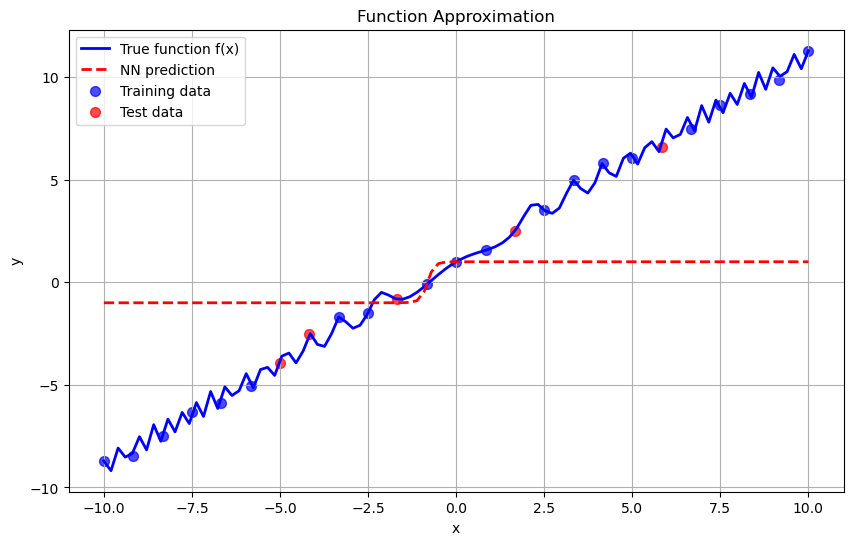


ASSIGNMENT SUMMARY:
• Function: f(x) = exp(-sin(x²)/2) + x
• Neural Network: 3 layers, 1 neuron each
• Training samples: 20
• Test samples: 5
• Training Error: 32.495132
• Test Error: 8.934979


In [9]:
# Plot: True function vs predictions
plt.figure(figsize=(10, 6))
x_plot = np.linspace(-10, 10, 100)
y_true_plot = target_function(x_plot)
y_pred_plot = predict(x_plot, w1, b1, w2, b2, w3, b3)

plt.plot(x_plot, y_true_plot, 'b-', label='True function f(x)', linewidth=2)
plt.plot(x_plot, y_pred_plot, 'r--', label='NN prediction', linewidth=2)
plt.scatter(x_train, y_train, c='blue', s=50, alpha=0.7, label='Training data')
plt.scatter(x_test, y_test, c='red', s=50, alpha=0.7, label='Test data')
plt.xlabel('x')
plt.ylabel('y')
plt.title('Function Approximation')
plt.legend()
plt.grid(True)
plt.show()

print("\n" + "="*60)
print("ASSIGNMENT SUMMARY:")
print("="*60)
print(f"• Function: f(x) = exp(-sin(x²)/2) + x")
print(f"• Neural Network: 3 layers, 1 neuron each")
print(f"• Training samples: {len(x_train)}")
print(f"• Test samples: {len(x_test)}")
print(f"• Training Error: {train_error:.6f}")
print(f"• Test Error: {test_error:.6f}")
print("="*60)